In [1]:
%matplotlib inline

import pandas as pd
import parse_att
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv('/media/extend/cache/total_0_1503424.csv')
#df = pd.read_feather('/media/extend/cache/total_0_10000')
train = pd.read_csv('../input/imgtop_train.csv', nrows=10000)

In [5]:
train.groupby('param_1')['price'].agg('mean')

param_1
ASUS                         6.583333e+03
Alcatel                      2.929909e+03
BQ                           1.524500e+03
BlackBerry                   1.150000e+04
DEXP                         2.500000e+03
Explay                       1.550000e+03
Fly                          2.199857e+03
HTC                          9.825000e+03
Highscreen                   9.966667e+02
Huawei                       5.625000e+03
IT, интернет, телеком        1.321429e+03
LG                           3.822231e+03
Lenovo                       4.980562e+03
MP3-плееры                   1.341667e+03
MTS                          1.566000e+03
Meizu                        9.388000e+03
Micromax                     2.250000e+03
Microsoft                    4.263333e+03
Motorola                     5.000000e+02
Nokia                        2.203960e+03
Philips                      3.150000e+03
Prestigio                    5.000000e+03
Samsung                      7.967680e+03
Sony                      

In [8]:
df.groupby('img_label')['price'].agg('mean')

img_label
0      -71.031393
1      -53.418665
2        7.679643
3        7.575923
4     -111.459174
5     -245.975875
6     -172.148850
7     -406.822938
8        6.649691
9     -156.284603
10       6.668100
11       7.565333
12     -93.848800
13     -20.964259
14    -159.175973
15    -360.527288
16    -106.950632
17    -333.650850
18    -259.564515
19     -40.115760
20     -99.023284
21    -382.278158
22    -246.517287
23    -398.872934
24    -304.125456
25    -260.249568
26    -144.963457
27    -281.002863
28    -137.606122
29     -13.003699
          ...    
965    -62.040699
966   -222.401265
967    -60.964214
968    -93.618500
969   -229.365054
970   -173.799714
971    -37.321325
972    -33.846945
973      7.600000
974   -304.202382
975    -58.061243
976    -99.096320
977    -93.457625
978    -46.879275
979    -29.830854
980      7.793455
981   -276.923967
982    -47.517836
983      6.675857
984   -206.452007
985   -127.928177
986    -29.469418
987    -13.608806
988   -108.666879


float32


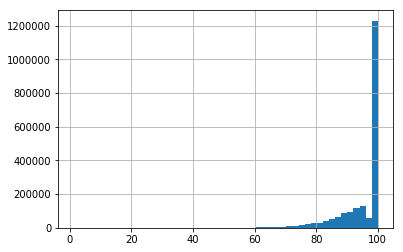

In [226]:
col = 'description_words_vs_unique'
print(df[col].dtype)
df[col].hist(bins=50)
#plt.hist(np.log(df[col]))

In [221]:
df[col].max()

21

In [127]:
selcols = ['parent_category_name', 'category_name', 'resnet_conf']
how = 'zscore'
by_cols = selcols[0:len(selcols)-1]
tar_col = selcols[len(selcols)-1]
att_name = '_'.join(selcols + [how])

In [122]:
sub_df = df[selcols]

In [124]:
gp = sub_df.groupby(by=by_cols)[tar_col].agg(['mean','var']).reset_index().\
                rename(index=str)

In [7]:
gp = pd.read_feather('/media/extend/cache/region_city_parent_category_name_category_name_price_zscore[0,10000].feather')

In [8]:
gp.head()

,index,region,city,parent_category_name,category_name,mean,var
0,0,0,13,0,44,6.327939,0.000100
1,1,0,13,4,10,5.010642,0.000000
2,2,0,13,4,29,6.449612,0.419793
3,3,0,13,5,13,-999.000000,0.000100
4,4,0,13,6,23,10.819778,0.000100


In [182]:
gp['var'].fillna(0.0001, inplace=True)

In [10]:
dummy =pd.get_dummies(gp.category_name)

In [13]:
dummy.iloc[0].dtype

dtype('uint8')

In [1]:
from catboost import Pool, CatBoostRegressor

In [2]:
?xgb.train